Cross-shelf transport (diff, adv, total) comparison between cases
==

This notebook explores the similarities and differences between the 3 tracer transports along case3DDIFF, CNTDIFF (when it is ready), and NOGMREDI as well as canyon and no canyon cases. It looks at the transport normal to a shelf break wall<sup>1</sup>. Total Tracer Transport (TracTrans) is understood here as tracer transport (concentration * transport) per cell area; similarly, Total Transport (Trans) is transport per cell area, which is only the speed. This gives the following units:

$[TracTrans] = [C]ms^{-1} $

$[Trans] = [v] = ms^{-1} $

TracTrans = AdvFlux + DiffFlux / cell area

<sup>1</sup> Plane that goes from shelf-break depth to surface and all along the shelf break

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('/ocean/kramosmu/Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import ShelfBreakTools_MITgcm as sb

import savitzky_golay as sg

In [3]:
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

FluxTR01 = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run03/FluxTR01Glob.nc'
FluxOut1 = Dataset(FluxTR01)

FluxTR03 = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run03/FluxTR03Glob.nc'
FluxOut3 = Dataset(FluxTR03)

CanyonGridNoC='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/gridGlob.nc'
CanyonGridOutNoC = Dataset(CanyonGridNoC)

CanyonStateNoC='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/stateGlob.nc'

FluxTR01NoC = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/FluxTR01Glob.nc'
FluxTR03NoC = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/FluxTR03Glob.nc'

In [4]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(CanyonGridNoC, 'HFacC')
MaskCNoC = rout.getMask(CanyonGridNoC, 'HFacC')

dxF = rout.getField(CanyonGrid, 'dxF')
drF = CanyonGridOut.variables['drF']

In [5]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

### Adv, Diff, Total

In [6]:
#ADVy01NoC = rout.getField(FluxTR01NoC,'ADVyTr01') # 
#ADVy01 = rout.getField(FluxTR01,'ADVyTr01') # 

#ADVy01NoC = rout.getField(FluxTR01NoC,'ADVxTr01') # 
#ADVy01 = rout.getField(FluxTR01,'ADVxTr01') # 

In [7]:
#DFyE01NoC = rout.getField(FluxTR01NoC,'DFyETr01') # 
#DFyE01 = rout.getField(FluxTR01,'DFyETr01') # 

#DFxE01NoC = rout.getField(FluxTR01NoC,'DFxETr01') # 
#DFxE01 = rout.getField(FluxTR01,'DFxETr01') # 

In [8]:
#VTRAC01NoC = rout.getField(FluxTR01NoC,'VTRAC01') #  
# This very similar to advective transport / cell area, so use instead of adv trans
VTRAC01 = rout.getField(FluxTR01,'VTRAC01') # 

#UTRAC01NoC = rout.getField(FluxTR01NoC,'UTRAC01') # 
UTRAC01 = rout.getField(FluxTR01,'UTRAC01') # 

V = rout.getField(CanyonState,'V') # 
#VNoC = rout.getField(CanyonStateNoC,'V') # 
U = rout.getField(CanyonState,'U') # 
#UNoC = rout.getField(CanyonStateNoC,'U') # 


In [9]:
zlev = 29
SBx, SBy = sb.findShelfBreak(zlev,hFacC)
SBxx = SBx[:-1]
SByy = SBy[:-1]
slope, theta = sb.findSlope(xc,yc,SBxx,SByy)
slopeFilt = sg.savitzky_golay(slope, 11, 3) # window size 11, polynomial order 3
thetaFilt = np.arctan(slopeFilt)


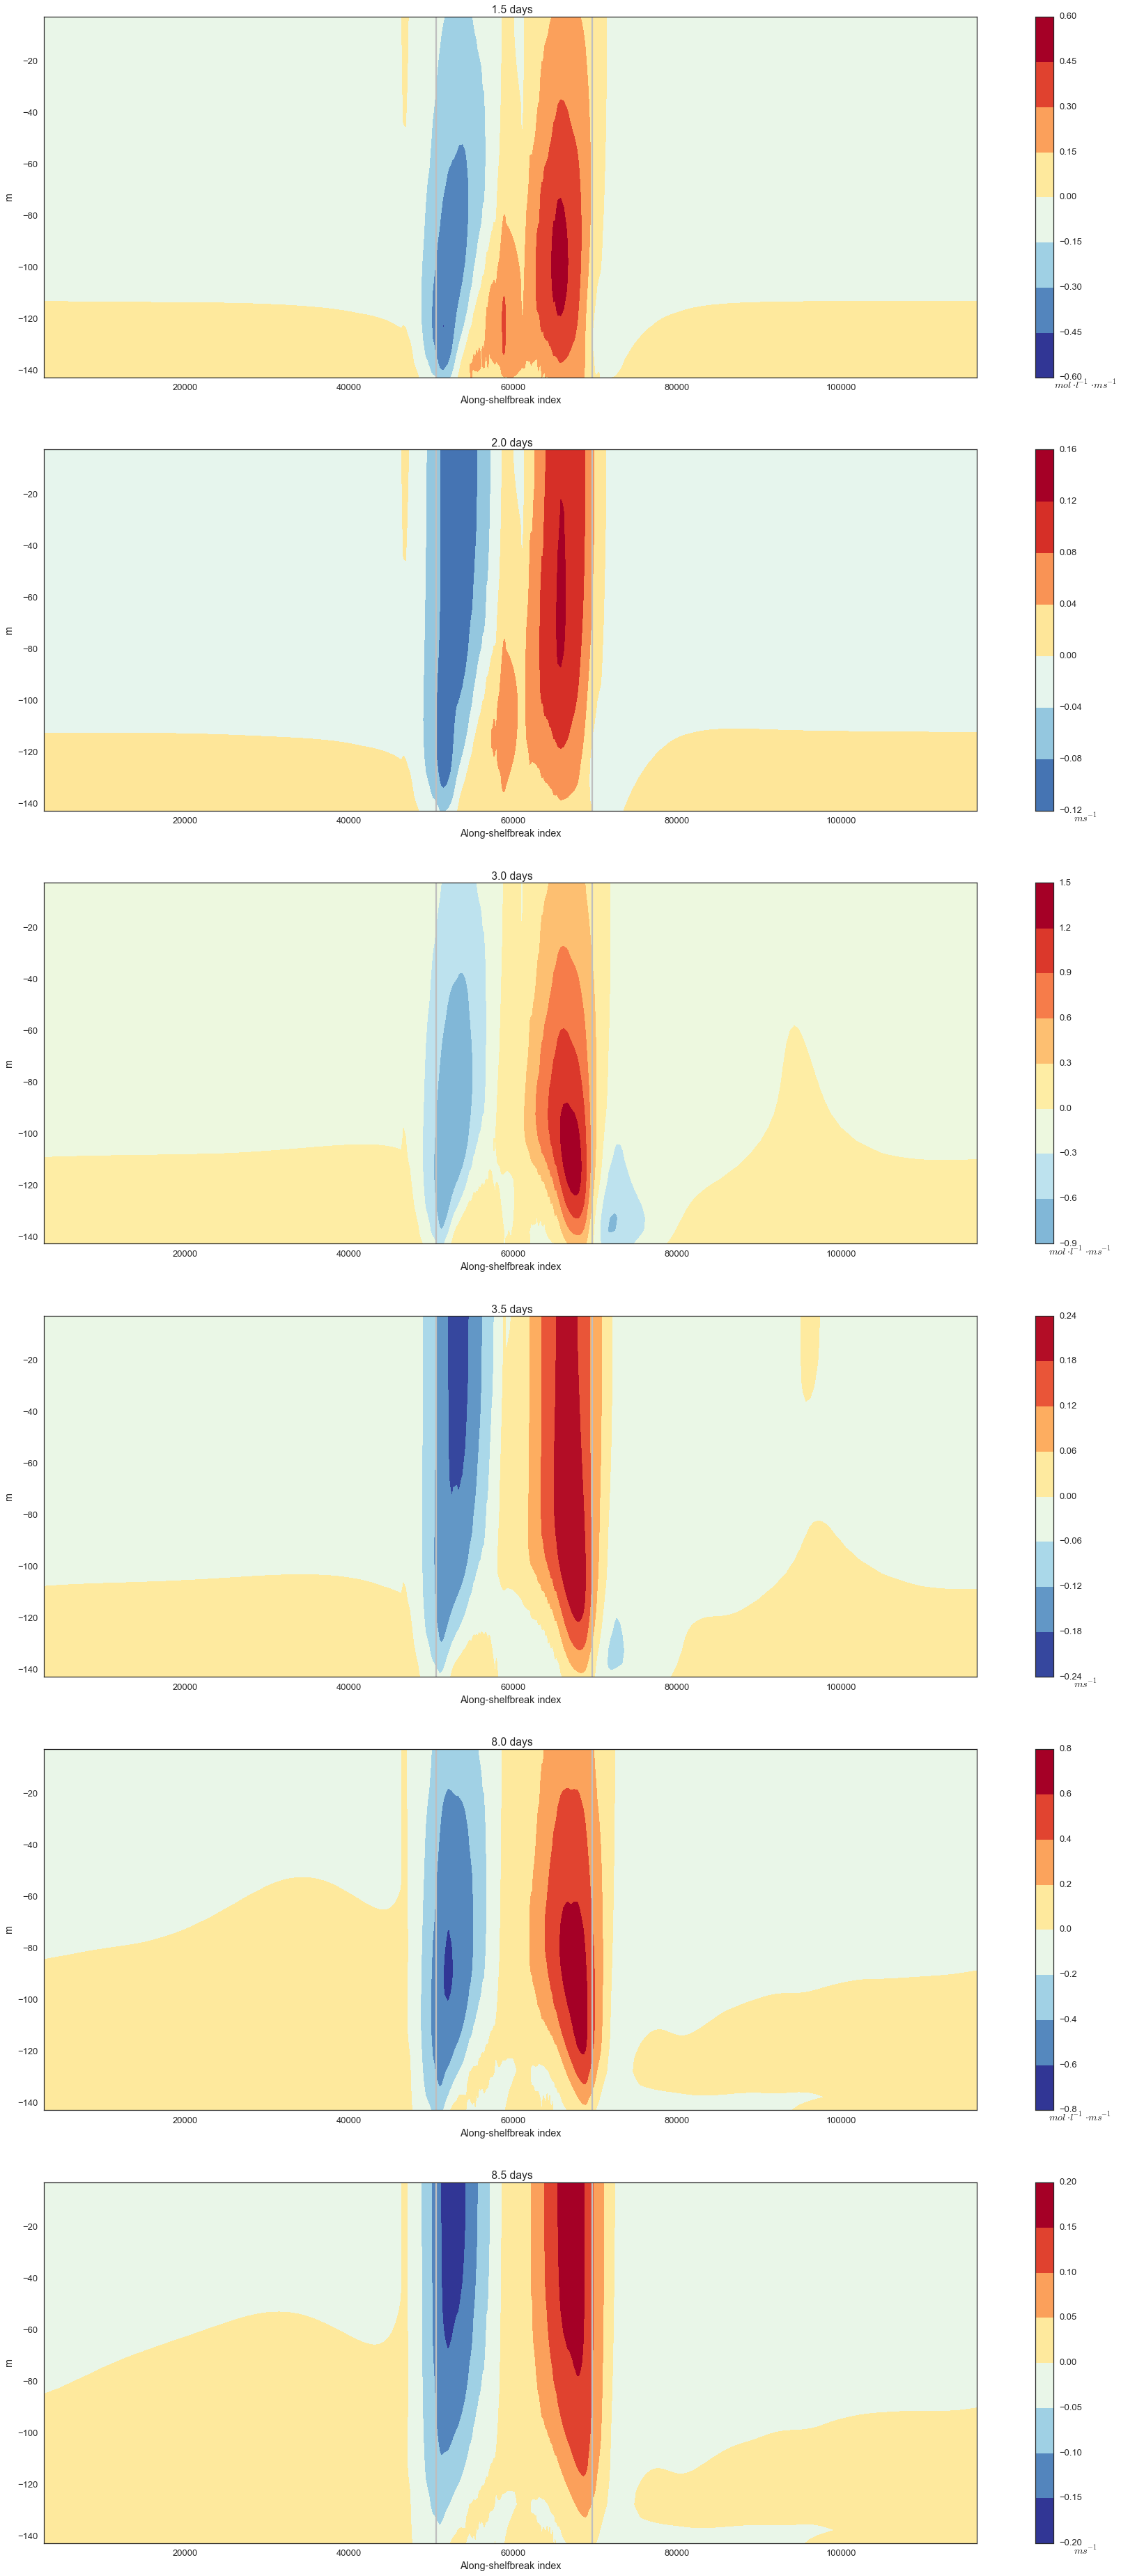

In [10]:
times = [2,5,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [3,6,16]
figSize=(30,65)
numCols = 1
numRows = 6
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'
kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt[0],VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt[0],UTRAC01,z,xc,zlev,hFacC,MaskC)
    
    VPlot = sb.MerFluxSB(SBxx,SByy,tt[1],V,z,xc,zlev,hFacC,MaskC)
    UPlot = sb.ZonFluxSB(SBxx,SByy,tt[1],U,z,xc,zlev,hFacC,MaskC)
    
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 
    
    sb.contourfFluxSB(tt[0],numCols,numRows,TracTrans,z,xc,unitsTr, 0,29,kk,zlev)
    sb.contourfFluxSB(tt[1],numCols,numRows,NormalVel,z,xc,unitsVel, 0,29,kk+1,zlev)
    
    
    kk = kk+2

    
   

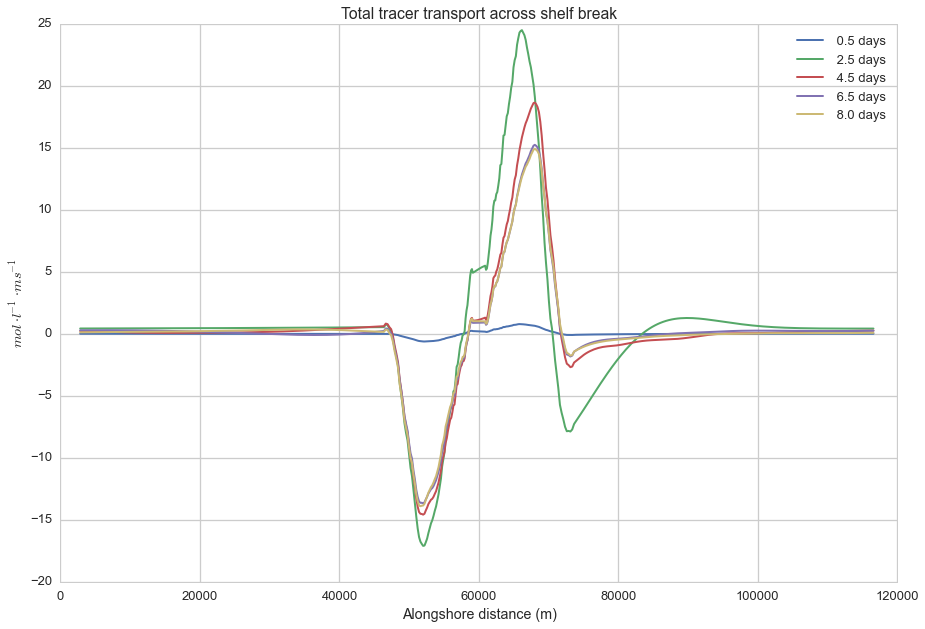

In [13]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1, rc={"lines.linewidth": 2.5})
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [1,5,9,13,16]
#figSize=(30,30)
figSize=(15,10)
numCols = 1
numRows = 1
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt[0],VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt[0],UTRAC01,z,xc,zlev,hFacC,MaskC)
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(xc[1,4:360-5],np.sum(TracTrans,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break')
    
    #VPlot = sb.MerFluxSB(SBxx,SByy,tt[1],V,z,xc,zlev,hFacC,MaskC)
    #UPlot = sb.ZonFluxSB(SBxx,SByy,tt[1],U,z,xc,zlev,hFacC,MaskC)
    #NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 
    #plt.subplot(numRows,numCols,2)
    #ax = plt.gca()
    #ax.plot(xc[1,4:360-5],np.sum(NormalVel,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    #plt.legend(loc=0)
    #plt.xlabel('Alongshore distance (m)')
    #plt.ylabel(unitsVel)
    #plt.title('Normal velocity')
    
    

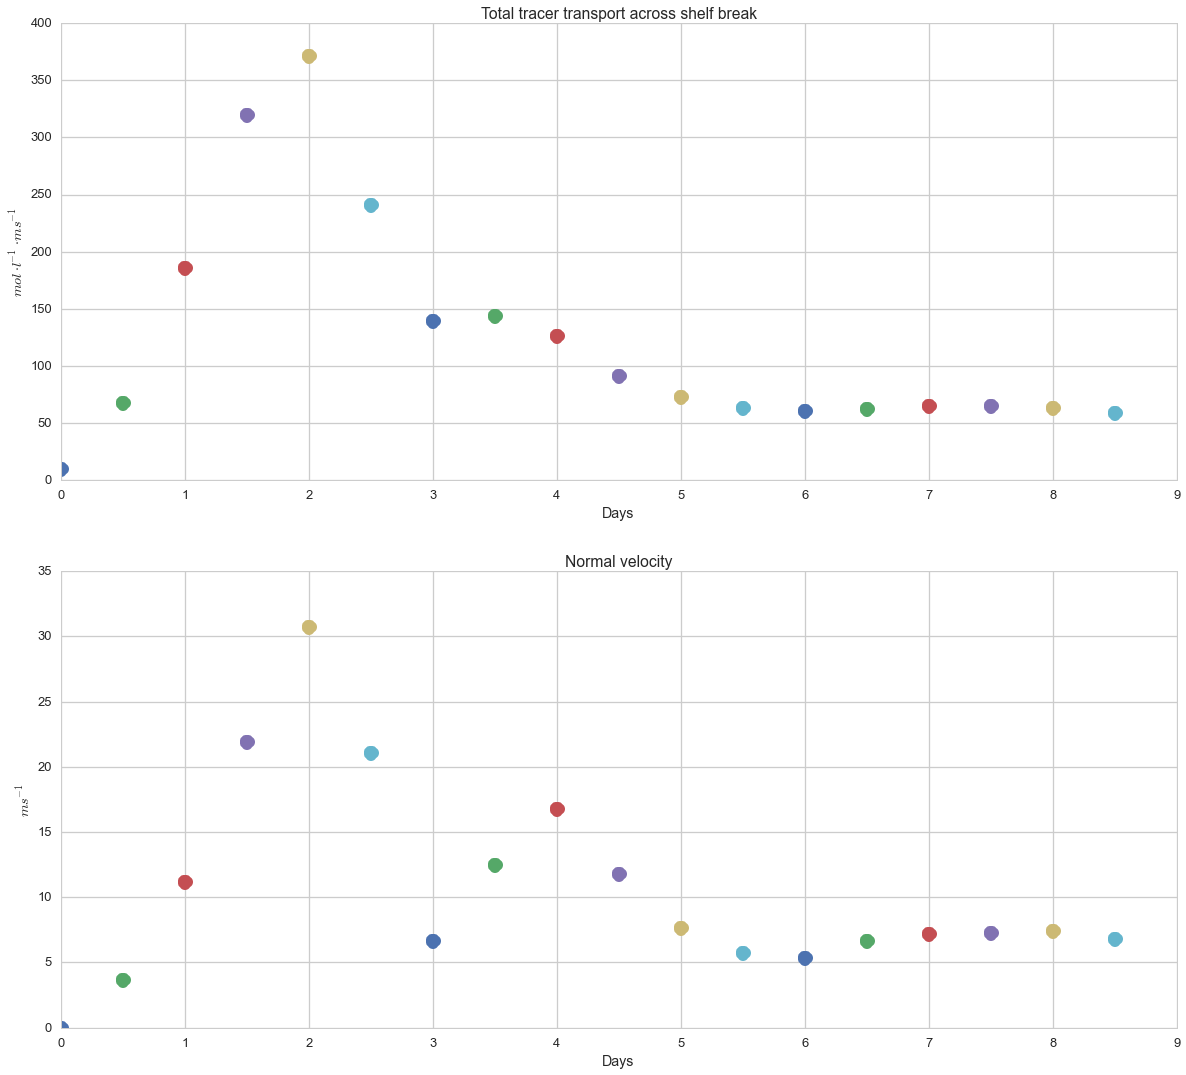

In [14]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1, rc={"lines.linewidth": 2.5})
times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times2 = range(18)
figSize=(20,18)
numCols = 1
numRows = 2
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt,VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt,UTRAC01,z,xc,zlev,hFacC,MaskC)
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(tt/2.0,np.sum(TracTrans),'o',markersize = 15,label = (" %1.1f days " % ((tt/2.)+0.5)))
    #plt.legend(loc=0)
    plt.xlabel('Days')
    plt.yticks
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break')
    
    VPlot = sb.MerFluxSB(SBxx,SByy,tt,V,z,xc,zlev,hFacC,MaskC)
    UPlot = sb.ZonFluxSB(SBxx,SByy,tt,U,z,xc,zlev,hFacC,MaskC)
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 
    plt.subplot(numRows,numCols,2)
    ax = plt.gca()
    ax.plot(tt/2.0,np.sum(NormalVel),'o',markersize = 15,label = (" %1.1f days " % ((tt/2.)+0.5)))
    #plt.legend(loc=0)
    plt.xlabel('Days')
    plt.ylabel(unitsVel)
    plt.title('Normal velocity')

In [15]:
VTRAC01NoC = rout.getField(FluxTR01NoC,'VTRAC01') #  
UTRAC01NoC = rout.getField(FluxTR01NoC,'UTRAC01') # 

VNoC = rout.getField(CanyonStateNoC,'V') # 
UNoC = rout.getField(CanyonStateNoC,'U') # 

###No-canyon case

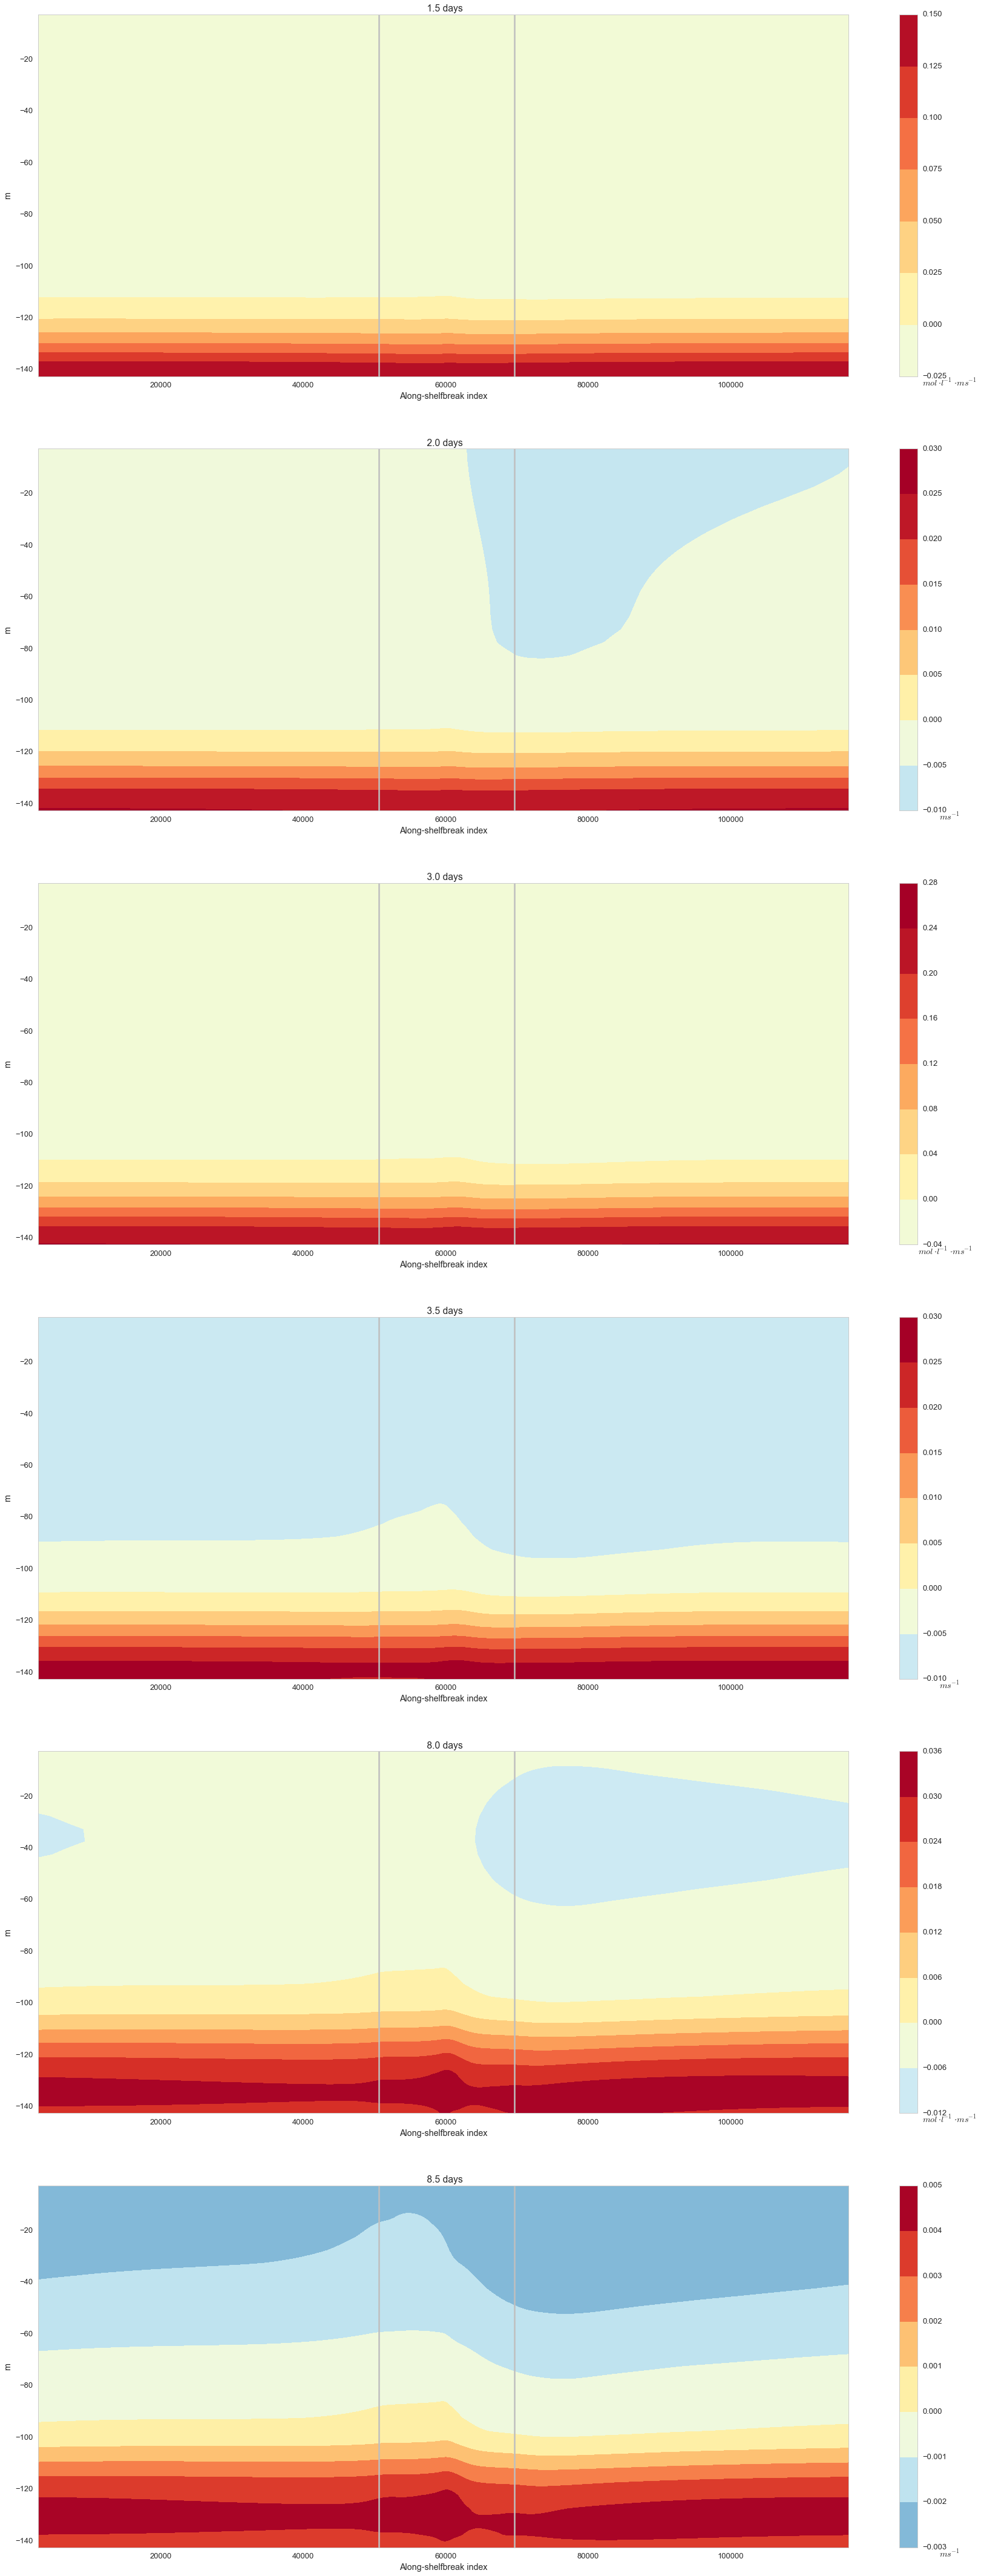

In [16]:
zlev = 29
SBxNoC, SByNoC = sb.findShelfBreak(zlev,hFacCNoC)
SBxxNoC = SBxNoC[:-1]
SByyNoC = SByNoC[:-1]
slopeNoC, thetaNoC = sb.findSlope(xc,yc,SBxxNoC,SByyNoC)
#slopeFiltNoC = sg.savitzky_golay(slopeNoC, 11, 3) # window size 11, polynomial order 3
slopeFiltNoC = slopeNoC
thetaFiltNoC = np.arctan(slopeFiltNoC)

times = [2,5,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [3,6,16]


figSize=(30,75)
numCols = 1
numRows = 6
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    
    VTRACPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt[0],VTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt[0],UTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    VPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt[1],VNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt[1],UNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlot[:,4:-4]*np.sin(-thetaFiltNoC) 
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFiltNoC) + UPlot[:,4:-4]*np.sin(-thetaFiltNoC) 

    sb.contourfFluxSB(tt[0],numCols,numRows,TracTrans,z,xc,unitsTr, 0,29,kk,zlev)
    sb.contourfFluxSB(tt[1],numCols,numRows,NormalVel,z,xc,unitsVel, 0,29,kk+1,zlev)
    
    kk = kk+2


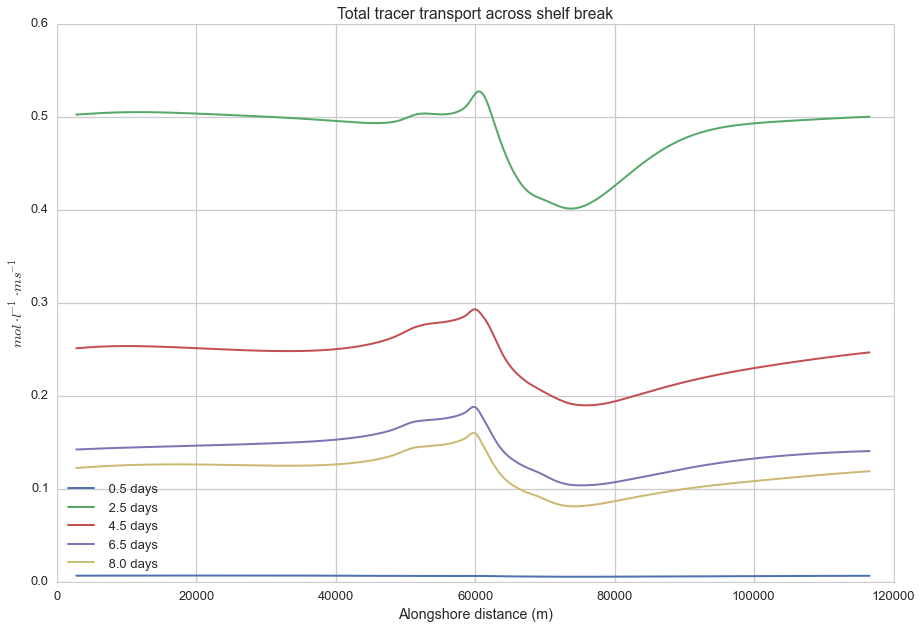

In [17]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1, rc={"lines.linewidth": 2.5})
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 
times2 = [1,5,9,13,16]
figSize=(15,10)
numCols = 1
numRows = 1
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in zip(times,times2):
    VTRACPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt[0],VTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt[0],UTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlot[:,4:-4]*np.sin(-thetaFiltNoC) 
    
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(xc[1,4:360-5],np.sum(TracTrans,axis=0),linewidth=2,label = (" %1.1f days " % ((tt[0]/2.)+0.5)))
    
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break')
    
    

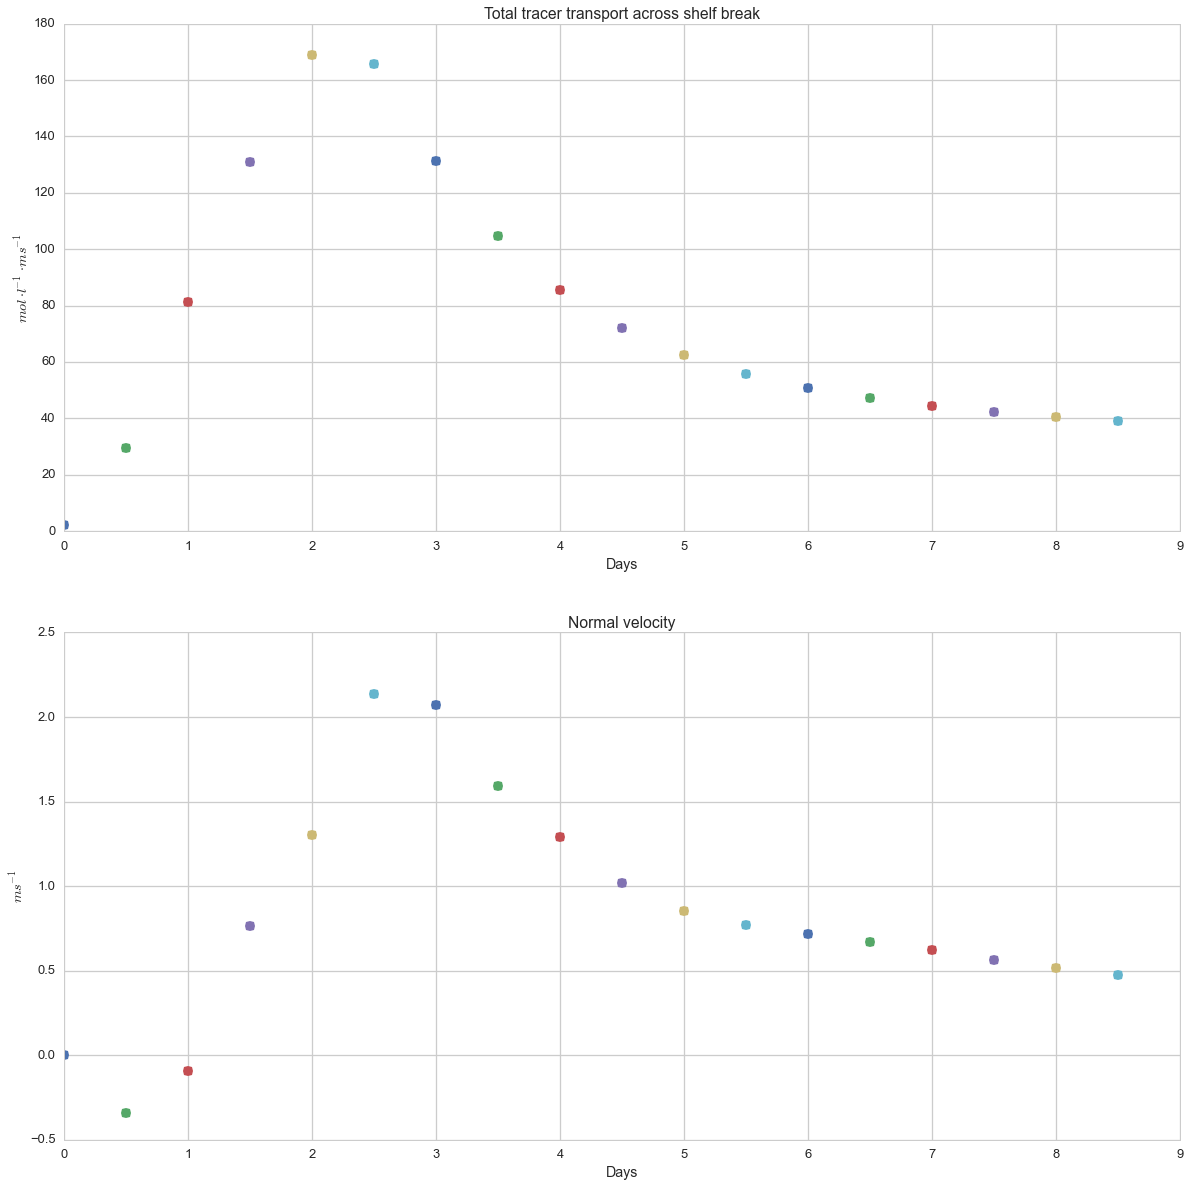

In [19]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1, rc={"lines.linewidth": 2.5})
times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times2 = range(18)
figSize=(20,20)
numCols = 1
numRows = 2
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    VTRACPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlot[:,4:-4]*np.sin(-thetaFiltNoC) 
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(tt/2.0,np.sum(TracTrans),'o',markersize = 10,label = (" %1.1f days " % ((tt/2.)+0.5)))
    #plt.legend(loc=0)
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break')
    
    VPlot = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UPlot = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFiltNoC) + UPlot[:,4:-4]*np.sin(-thetaFiltNoC) 
    plt.subplot(numRows,numCols,2)
    ax = plt.gca()
    ax.plot(tt/2.0,np.sum(NormalVel),'o',markersize = 10,
            
            
    label = (" %1.1f days " % ((tt/2.)+0.5)))
    #plt.legend(loc=0)
    plt.xlabel('Days')
    plt.ylabel(unitsVel)
    plt.title('Normal velocity')

##Canyon effect

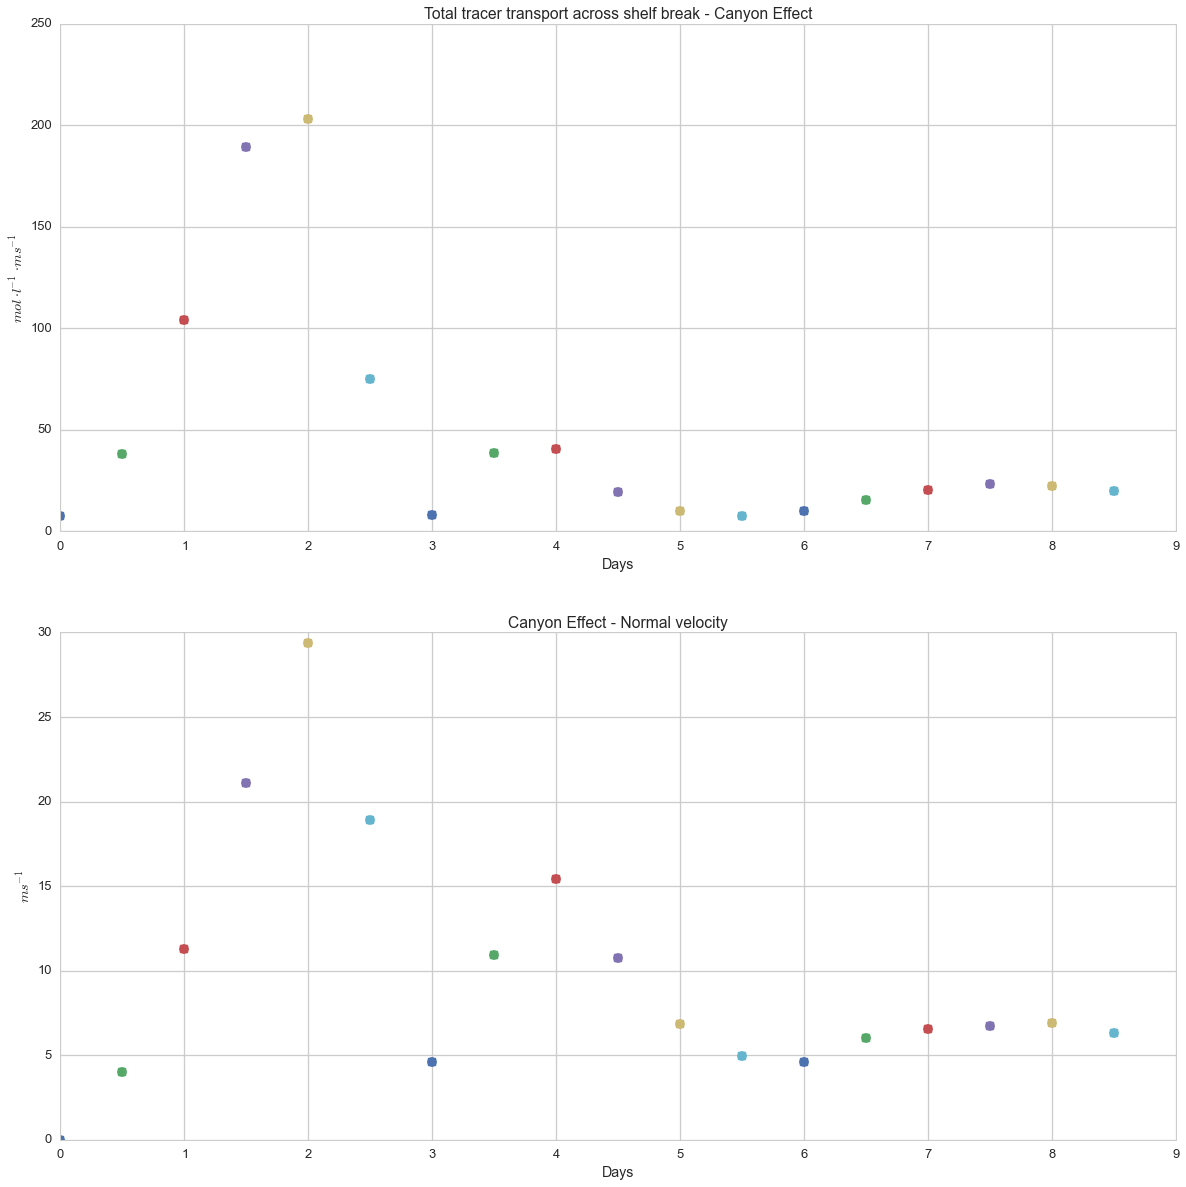

In [20]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1, rc={"lines.linewidth": 2.5})
times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times2 = range(18)
figSize=(20,20)
numCols = 1
numRows = 2
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    VTRACPlot = sb.MerFluxSB(SBxx,SByy,tt,VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot = sb.ZonFluxSB(SBxx,SByy,tt,UTRAC01,z,xc,zlev,hFacC,MaskC)
    
    VTRACPlotNoC = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlotNoC = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    TracTrans =  VTRACPlot[:,4:-5]*np.cos(thetaFilt) + UTRACPlot[:,4:-4]*np.sin(-thetaFilt) 
    TracTransNoC =  VTRACPlotNoC[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlotNoC[:,4:-4]*np.sin(-thetaFiltNoC) 
    
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(tt/2.0,np.sum(TracTrans)-np.sum(TracTransNoC),'o',markersize = 10,label = (" %1.1f days " % ((tt/2.)+0.5)))
    #plt.legend(loc=0)
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break - Canyon Effect')
    
    VPlot = sb.MerFluxSB(SBxx,SByy,tt,V,z,xc,zlev,hFacC,MaskC)
    UPlot = sb.ZonFluxSB(SBxx,SByy,tt,U,z,xc,zlev,hFacC,MaskC)
    
    VPlotNoC = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UPlotNoC = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    NormalVel =  VPlot[:,4:-5]*np.cos(thetaFilt) + UPlot[:,4:-4]*np.sin(-thetaFilt) 
    NormalVelNoC =  VPlotNoC[:,4:-5]*np.cos(thetaFiltNoC) + UPlotNoC[:,4:-4]*np.sin(-thetaFiltNoC) 
    
    plt.subplot(numRows,numCols,2)
    ax = plt.gca()
    ax.plot(tt/2.0,np.sum(NormalVel)-np.sum(NormalVelNoC),'o',markersize = 10,
    
    label = (" %1.1f days " % ((tt/2.)+0.5)))
    #plt.legend(loc=0)
    plt.xlabel('Days')
    plt.ylabel(unitsVel)
    plt.title('Canyon Effect - Normal velocity')

In [21]:
VTRAC03 = rout.getField(FluxTR03,'VTRAC03') # 


UTRAC03 = rout.getField(FluxTR03,'UTRAC03') # 



In [22]:
UTRAC03NoC = rout.getField(FluxTR03NoC,'UTRAC03') # 
VTRAC03NoC = rout.getField(FluxTR03NoC,'VTRAC03') # 

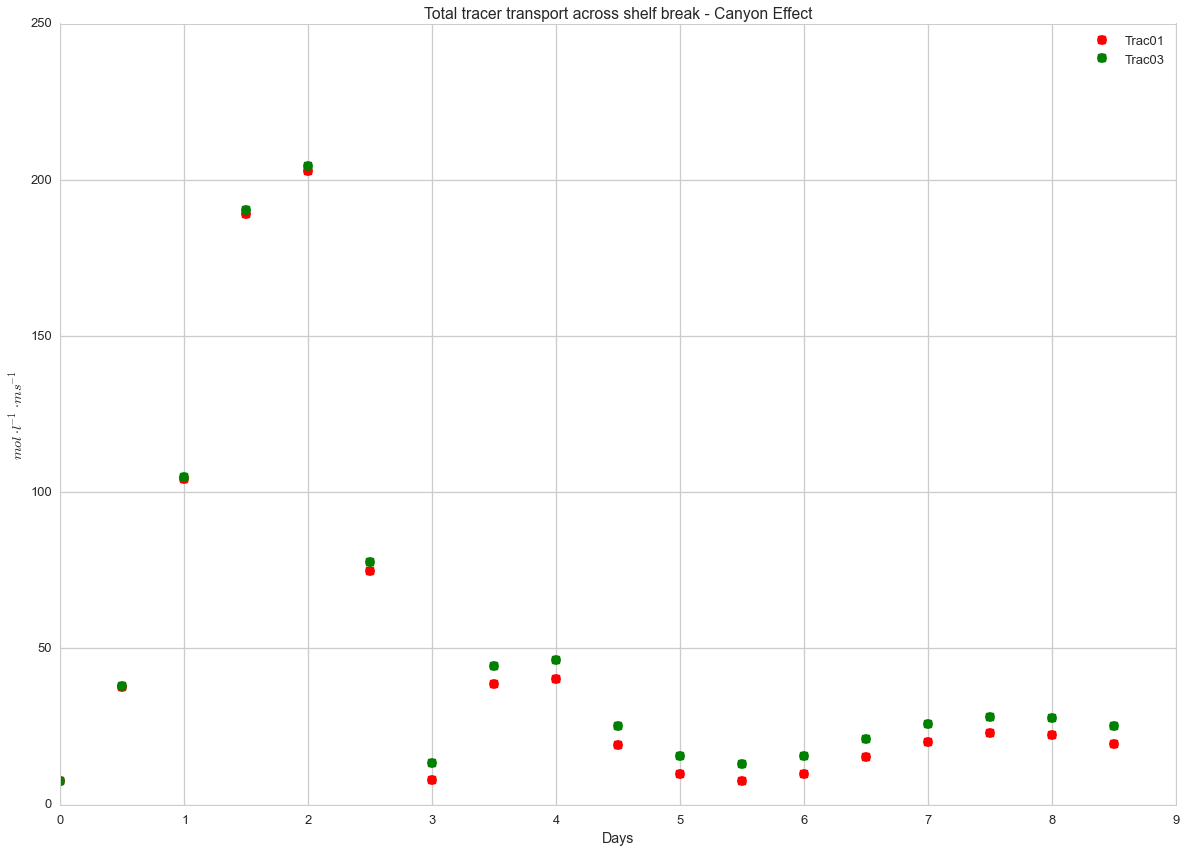

In [24]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1, rc={"lines.linewidth": 2.5})
times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times2 = range(18)
figSize=(20,14)
numCols = 1
numRows = 1
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    VTRACPlot3 = sb.MerFluxSB(SBxx,SByy,tt,VTRAC03,z,xc,zlev,hFacC,MaskC)
    UTRACPlot3 = sb.ZonFluxSB(SBxx,SByy,tt,UTRAC03,z,xc,zlev,hFacC,MaskC)
    
    VTRACPlotNoC3 = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VTRAC03NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlotNoC3 = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UTRAC03NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    VTRACPlot1 = sb.MerFluxSB(SBxx,SByy,tt,VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot1 = sb.ZonFluxSB(SBxx,SByy,tt,UTRAC01,z,xc,zlev,hFacC,MaskC)
    
    VTRACPlotNoC1 = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlotNoC1 = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    TracTrans3 =  VTRACPlot3[:,4:-5]*np.cos(thetaFilt) + UTRACPlot3[:,4:-4]*np.sin(-thetaFilt) 
    TracTransNoC3 =  VTRACPlotNoC3[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlotNoC3[:,4:-4]*np.sin(-thetaFiltNoC) 
    
    TracTrans1 =  VTRACPlot1[:,4:-5]*np.cos(thetaFilt) + UTRACPlot1[:,4:-4]*np.sin(-thetaFilt) 
    TracTransNoC1 =  VTRACPlotNoC1[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlotNoC1[:,4:-4]*np.sin(-thetaFiltNoC) 
    
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(tt/2.0,np.sum(TracTrans1)-np.sum(TracTransNoC1),'ro-',markersize = 10,label = 'Trac01')
    ax.plot(tt/2.0,np.sum(TracTrans3)-np.sum(TracTransNoC3),'go-',markersize = 10,label = 'Trac03')
    
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
              [label for i,label in enumerate(labels) if i in display])
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break - Canyon Effect')
    

In [ ]:
times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times2 = range(18)
zlev = 29

ToTalTracTrans01=np.empty(19)
ToTalTracTrans01NoC=np.empty(19)
ToTalTracTrans03=np.empty(19)
ToTalTracTrans03NoC=np.empty(19)    

for tt in times:
    VTRACPlot3 = sb.MerFluxSB(SBxx,SByy,tt,VTRAC03,z,xc,zlev,hFacC,MaskC)
    UTRACPlot3 = sb.ZonFluxSB(SBxx,SByy,tt,UTRAC03,z,xc,zlev,hFacC,MaskC)
    
    VTRACPlotNoC3 = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VTRAC03NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlotNoC3 = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UTRAC03NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    VTRACPlot1 = sb.MerFluxSB(SBxx,SByy,tt,VTRAC01,z,xc,zlev,hFacC,MaskC)
    UTRACPlot1 = sb.ZonFluxSB(SBxx,SByy,tt,UTRAC01,z,xc,zlev,hFacC,MaskC)
    
    VTRACPlotNoC1 = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlotNoC1 = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UTRAC01NoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    TracTrans3 =  VTRACPlot3[:,4:-5]*np.cos(thetaFilt) + UTRACPlot3[:,4:-4]*np.sin(-thetaFilt) 
    TracTransNoC3 =  VTRACPlotNoC3[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlotNoC3[:,4:-4]*np.sin(-thetaFiltNoC) 
    
    TracTrans1 =  VTRACPlot1[:,4:-5]*np.cos(thetaFilt) + UTRACPlot1[:,4:-4]*np.sin(-thetaFilt) 
    TracTransNoC1 =  VTRACPlotNoC1[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlotNoC1[:,4:-4]*np.sin(-thetaFiltNoC) 
    
    ToTalTracTrans01[tt]=np.sum(TracTrans1)
    ToTalTracTrans01NoC[tt]=np.sum(TracTransNoC1)
    ToTalTracTrans03[tt]=np.sum(TracTrans3)
    ToTalTracTrans03NoC[tt]=np.sum(TracTransNoC3)



In [61]:
CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run01/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

FluxTR013d = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run01/FluxTR01Glob.nc'
FluxOut13d = Dataset(FluxTR013d)

FluxTR033d = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run03/FluxTR01Glob.nc'
FluxOut33d = Dataset(FluxTR033d)


In [62]:
UTRAC013d = rout.getField(FluxTR013d,'UTRAC01') # 
VTRAC013d = rout.getField(FluxTR013d,'VTRAC01') # 
UTRAC033d = rout.getField(FluxTR033d,'UTRAC01') # 
VTRAC033d = rout.getField(FluxTR033d,'VTRAC01') # 

In [65]:
times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times2 = range(18)
zlev = 29

ToTalTracTrans3d01=np.empty(19)
ToTalTracTrans033d=np.empty(19)

for tt in times:
    VTRACPlot3 = sb.MerFluxSB(SBxx,SByy,tt,VTRAC033d,z,xc,zlev,hFacC,MaskC)
    UTRACPlot3 = sb.ZonFluxSB(SBxx,SByy,tt,UTRAC033d,z,xc,zlev,hFacC,MaskC)
    
    
    VTRACPlot1 = sb.MerFluxSB(SBxx,SByy,tt,VTRAC013d,z,xc,zlev,hFacC,MaskC)
    UTRACPlot1 = sb.ZonFluxSB(SBxx,SByy,tt,UTRAC013d,z,xc,zlev,hFacC,MaskC)
    
    
    TracTrans3 =  VTRACPlot3[:,4:-5]*np.cos(thetaFilt) + UTRACPlot3[:,4:-4]*np.sin(-thetaFilt) 
    
    TracTrans1 =  VTRACPlot1[:,4:-5]*np.cos(thetaFilt) + UTRACPlot1[:,4:-4]*np.sin(-thetaFilt) 
    
    ToTalTracTrans3d01[tt]=np.sum(TracTrans1)
    ToTalTracTrans033d[tt]=np.sum(TracTrans3)
    

In [67]:
print(ToTalTracTrans01)

[  9.61288298e+000   6.71597429e+001   1.85591034e+002   3.20066664e+002
   3.71702564e+002   2.40629178e+002   1.39201715e+002   1.43191191e+002
   1.25823541e+002   9.10740932e+001   7.22221532e+001   6.31962761e+001
   6.05306315e+001   6.23040217e+001   6.43960406e+001   6.50485798e+001
   6.25468130e+001   5.84112103e+001   7.74860419e-304]


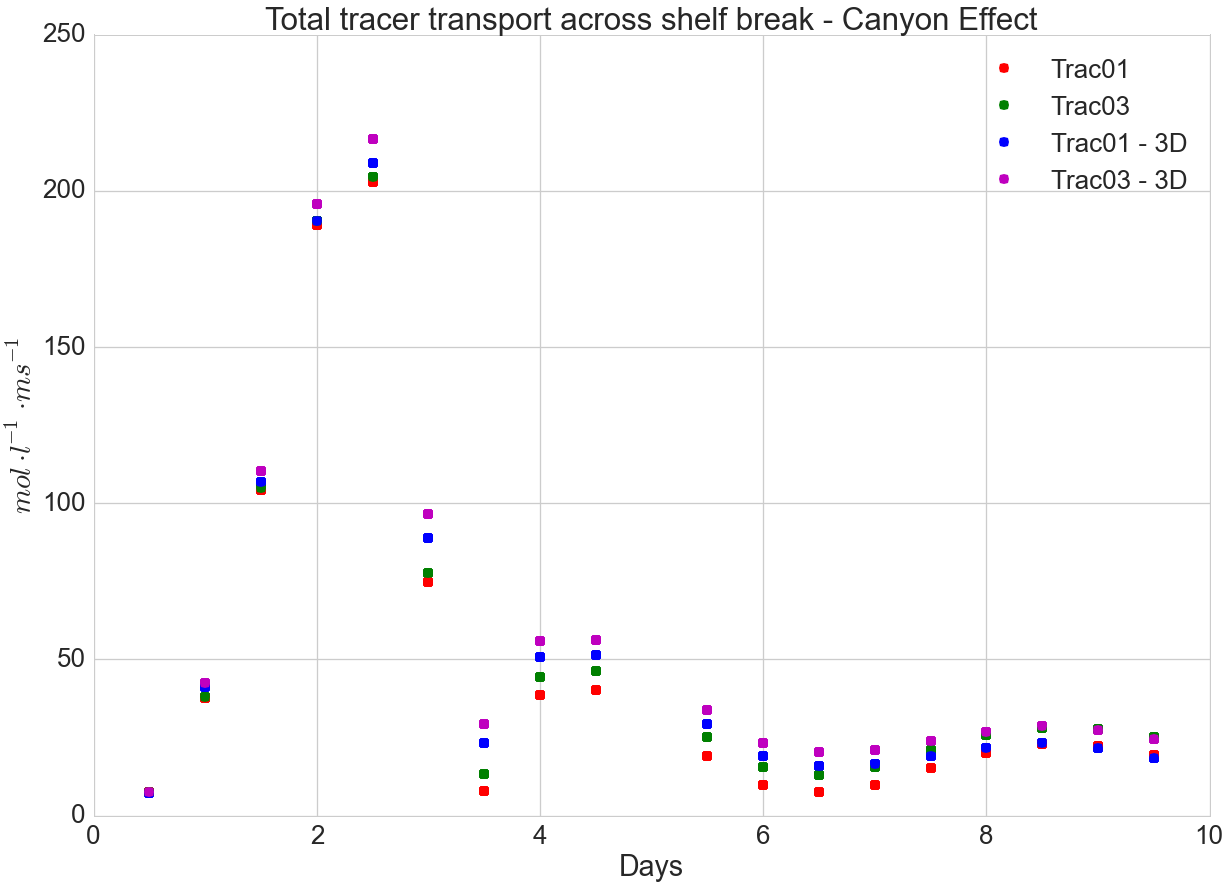

In [81]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})
#times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5]
times2 = range(18)
figSize=(20,14)
numCols = 1
numRows = 1
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(times,ToTalTracTrans01[:-1]-ToTalTracTrans01NoC[:-1],'ro',markersize = 10,label = 'Trac01')
    ax.plot(times,ToTalTracTrans03[:-1]-ToTalTracTrans03NoC[:-1],'go',markersize = 10,label = 'Trac03')
    ax.plot(times,ToTalTracTrans3d01[:-1]-ToTalTracTrans01NoC[:-1],'bo',markersize = 10,label = 'Trac01 - 3D')
    ax.plot(times,ToTalTracTrans033d[:-1]-ToTalTracTrans03NoC[:-1],'mo',markersize = 10,label = 'Trac03 - 3D')
    
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,3)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
              [label for i,label in enumerate(labels) if i in display])
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break - Canyon Effect')
    

### Closed boundaries case

In [10]:
# Until I get the flux diagnostics, I have to make the UTRAC's and VTRAC's.

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

CanyonPtracers='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/ptracersGlob.nc'

CanyonState2='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run06/stateGlob.nc'
CanyonStateOut2 = Dataset(CanyonState2)

CanyonPtracers2='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run06/ptracersGlob.nc'


# Until I get the flux diagnostics, I have to make the UTRAC's and VTRAC's.

#FluxTR013d = '/Volumes/MOBY/3DDIFF/run01/FluxTR01Glob.nc'
#FluxOut13d = Dataset(FluxTR013d)

#FluxTR033d = '/Volumes/MOBY/3DDIFF/run03/FluxTR01Glob.nc'
#FluxOut33d = Dataset(FluxTR033d)


In [11]:
#UTRAC013d = rout.getField(FluxTR013d,'UTRAC01') # 
#VTRAC013d = rout.getField(FluxTR013d,'VTRAC01') # 
#UTRAC033d = rout.getField(FluxTR033d,'UTRAC01') # 
#VTRAC033d = rout.getField(FluxTR033d,'VTRAC01') # 

V = rout.getField(CanyonState,'V') # 
U = rout.getField(CanyonState,'U') # 

V2 = rout.getField(CanyonState,'V') # 
U2 = rout.getField(CanyonState,'U') # 

UnstagU = (U[...,:-1]+U[...,1:])/2.0 
UnstagV = (V[...,:-1,:]+V[...,1:,:])/2.0 

UnstagU2 = (U2[...,:-1]+U2[...,1:])/2.0 
UnstagV2 = (V2[...,:-1,:]+V2[...,1:,:])/2.0 

TimeUnstagU = (UnstagU[:-1,...]+UnstagU[1:,...])/2.0 
TimeUnstagV = (UnstagV[:-1,...]+UnstagV[1:,...])/2.0 

TimeUnstagU2 = (UnstagU2[:-1,...]+UnstagU2[1:,...])/2.0 
TimeUnstagV2 = (UnstagV2[:-1,...]+UnstagV2[1:,...])/2.0 

Tr1run05 = rout.getField(CanyonPtracers,'Tr1') # 
Tr1run06 = rout.getField(CanyonPtracers2,'Tr1') # 


TimeUnstagTr1run05 = (Tr1run05[:-1,...]+Tr1run05[1:,...])/2.0 
TimeUnstagTr1run06 = (Tr1run06[:-1,...]+Tr1run06[1:,...])/2.0 


In [12]:
UTRAC01run05 = TimeUnstagU*TimeUnstagTr1run05
VTRAC01run05 = TimeUnstagV*TimeUnstagTr1run05



In [13]:
UTRAC01run06 = TimeUnstagU2*TimeUnstagTr1run06
VTRAC01run06 = TimeUnstagV2*TimeUnstagTr1run06


In [14]:

SBxNoC, SByNoC = sb.findShelfBreak(zlev,hFacCNoC)
SBxxNoC = SBxNoC[:-1]
SByyNoC = SByNoC[:-1]
slopeNoC, thetaNoC = sb.findSlope(xc,yc,SBxxNoC,SByyNoC)
#slopeFiltNoC = sg.savitzky_golay(slopeNoC, 11, 3) # window size 11, polynomial order 3
slopeFiltNoC = slopeNoC
thetaFiltNoC = np.arctan(slopeFiltNoC)

times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times2 = range(18)
zlev = 29

ToTalTracTransRun05=np.empty(19)
ToTalTracTransRun06=np.empty(19)

for tt in times:
    
    VTRACPlot1 = sb.MerFluxSBNoUnstag(SBxx,SByy,tt,VTRAC01run05,z,xc,zlev,hFacC,MaskC)
    UTRACPlot1 = sb.ZonFluxSBNoUnstag(SBxx,SByy,tt,UTRAC01run05,z,xc,zlev,hFacC,MaskC)
    
    VTRACPlot2 = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VTRAC01run06,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlot2 = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UTRAC01run06,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    TracTrans1 =  VTRACPlot1[:,4:-5]*np.cos(thetaFilt) + UTRACPlot1[:,4:-4]*np.sin(-thetaFilt) 
    TracTrans2 =  VTRACPlot2[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlot2[:,4:-4]*np.sin(-thetaFiltNoC) 
    
    ToTalTracTransRun05[tt]=np.sum(TracTrans1)
    ToTalTracTransRun06[tt]=np.sum(TracTrans2)
    

In [15]:
print(np.shape(ToTalTracTransRun05))

(19,)


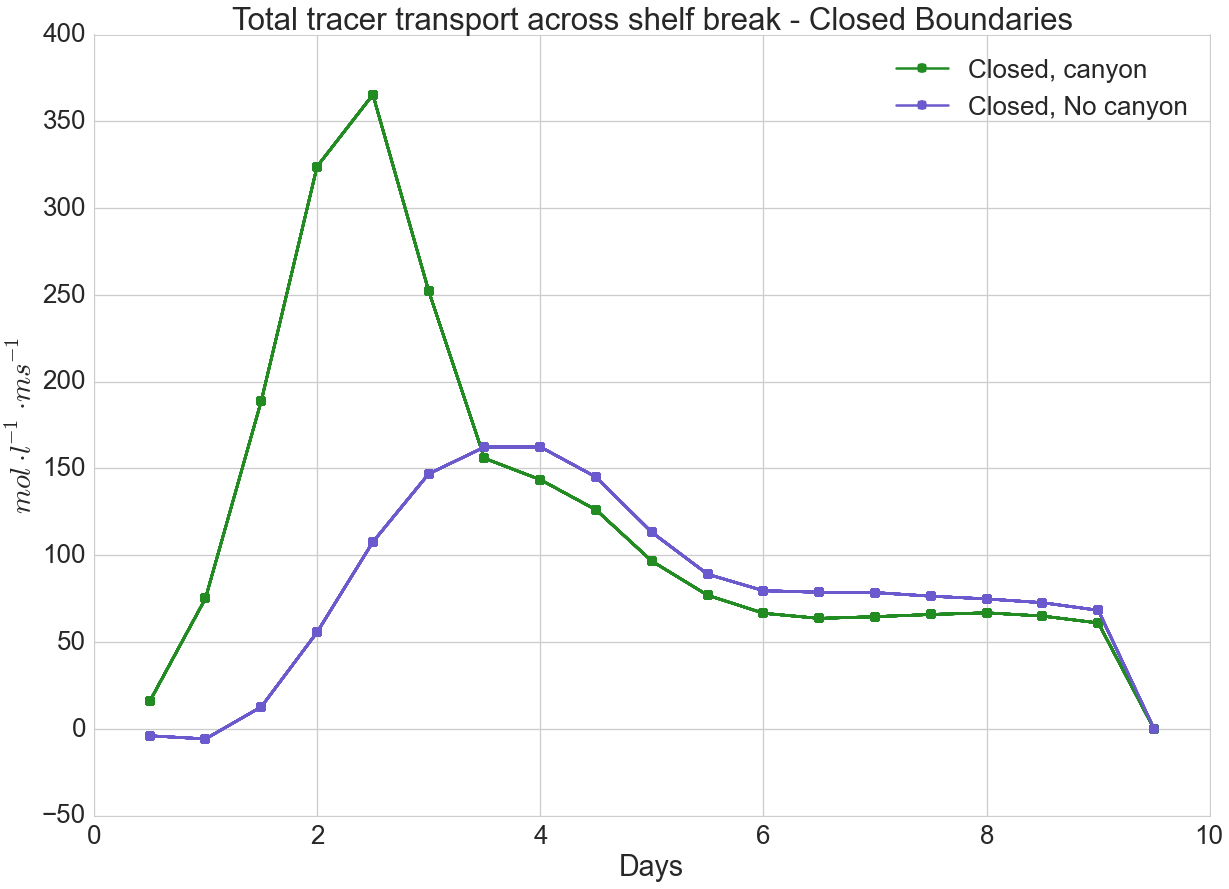

In [30]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})
#times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5]
times2 = range(18)
figSize=(20,14)
numCols = 1
numRows = 1
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(times,ToTalTracTransRun05[:],'o-',color='ForestGreen',markersize = 10,label = 'Closed, canyon')
    ax.plot(times,ToTalTracTransRun06[:],'o-',color='SlateBlue',markersize = 10,label = 'Closed, No canyon')
    
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
              [label for i,label in enumerate(labels) if i in display])
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break - Closed Boundaries')
    

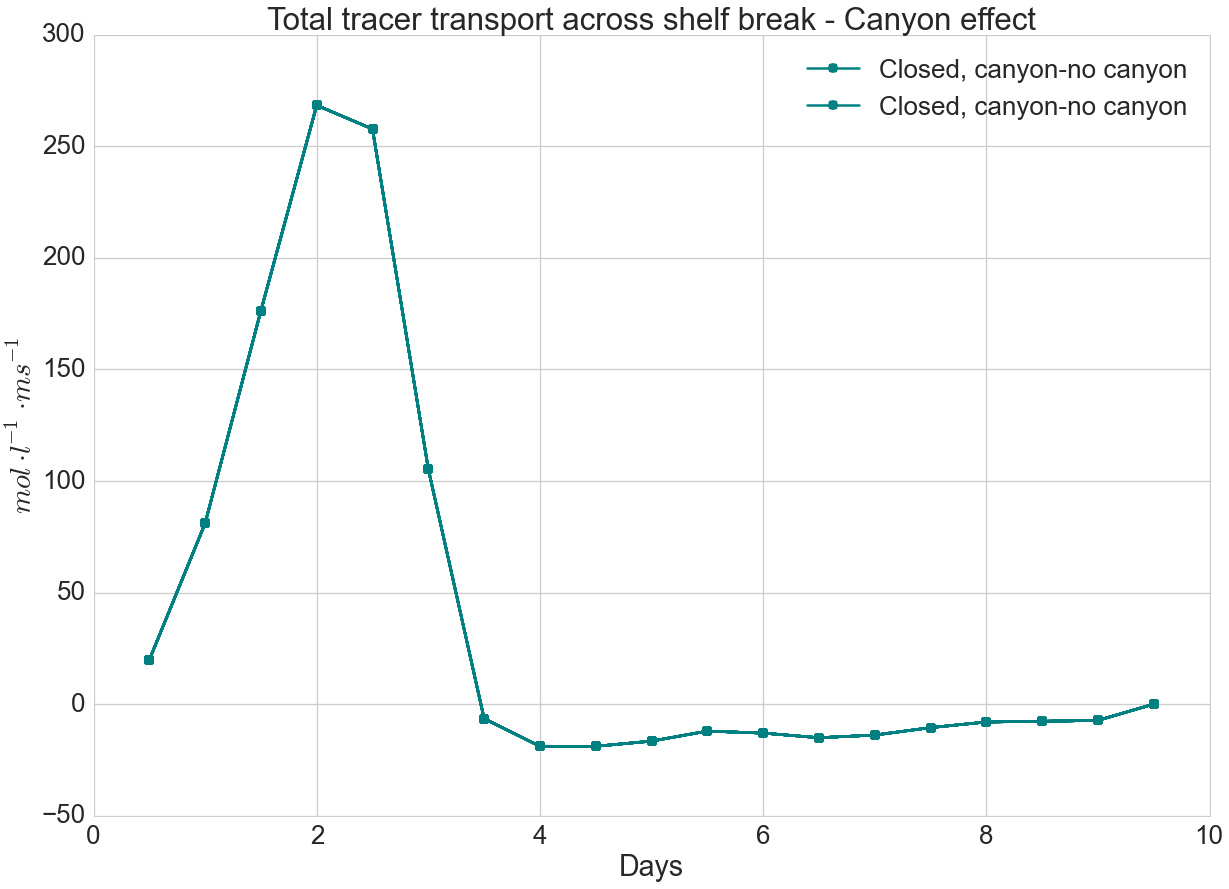

In [25]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})
#times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5]
times2 = range(18)
figSize=(20,14)
numCols = 1
numRows = 1
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(times,ToTalTracTransRun05[:]-ToTalTracTransRun06[:],'o-',color = 'Teal',markersize = 10,label = 'Closed, canyon-no canyon')
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
              [label for i,label in enumerate(labels) if i in display])
    
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break - Canyon effect')
    

14038.51454823